In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("C:\\Users\\Shruti Udagire\\Supervised_Categorical\\Kaggle\\heart.csv")

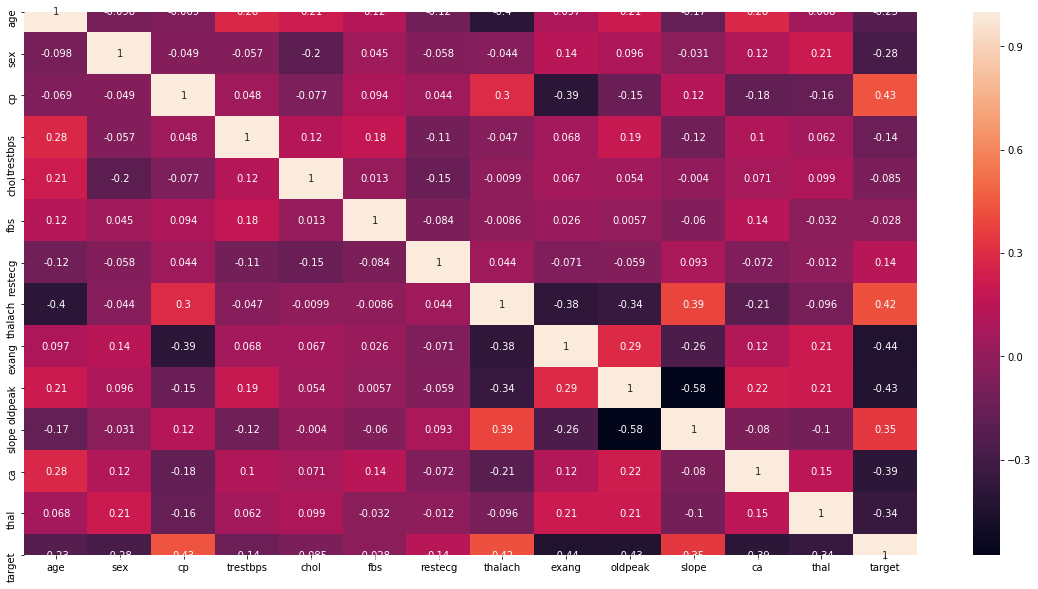

In [4]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

# Gender and target

1    207
0     96
Name: sex, dtype: int64


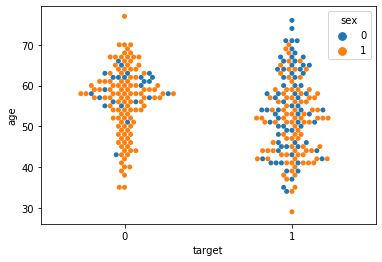

In [6]:
print(df['sex'].value_counts())
sns.swarmplot(df['target'],df['age'],hue=df['sex'])

1    93
0    72
Name: sex, dtype: int64


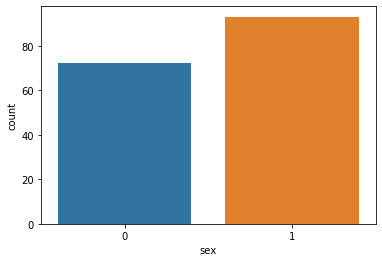

In [7]:
# For Heart Disease
df_1=df[(df['target']==1)]
print(df_1['sex'].value_counts())
sns.countplot(df_1['sex'])

1    114
0     24
Name: sex, dtype: int64


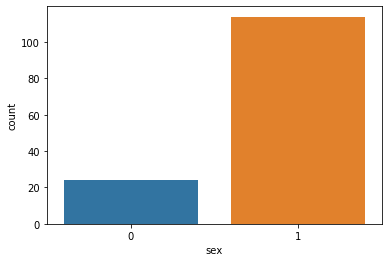

In [9]:
# For No Heart Disease
df_0=df[(df['target']==0)]
print(df_0['sex'].value_counts())
sns.countplot(df_0['sex'])

From the above data we can see there are 207 Male and 96 Female that is there are more number of male compared to female

Out of total 96 female, we have 72 female that have heart diseases and remaining 24 dont have 

Out of total 207 male, we have 93 that have heart diseases and remaining 114 dont have

# Age 

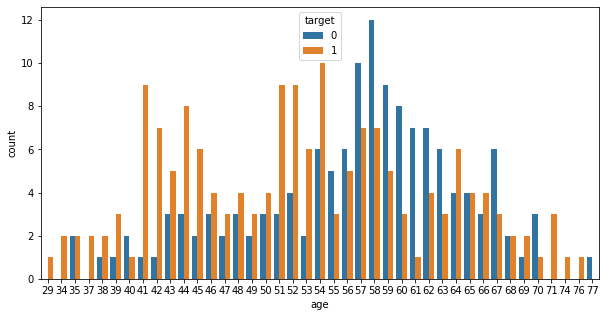

In [10]:
 plt.figure(figsize=(10,5))
sns.countplot(df['age'],hue=df['target'])

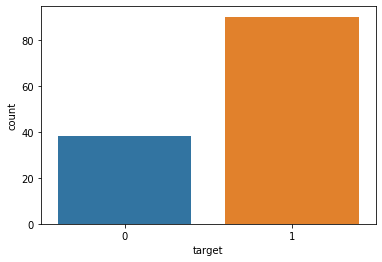

In [11]:
df_54=df[(df['age']<54)]
sns.countplot(df_54['target'])

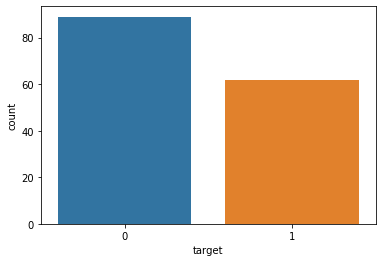

In [101]:
df_55=df[(df['age']>55)]
sns.countplot(df_55['target'])

Before age 54 we can see more number of people are prone to heart disease where as

after age 55 we have people prone to heart diseases but the count of no heart diseases is more

# Serum cholestoral in mg/dl

In [13]:
df['chol_cat']='NO'
# split the data using Q1,Q2,Q3,Q4
# Less than equal to 211-(1)
# greater than  equal to 212 and less than  equal to 240-(2)
# greater than  equal to 241 and less than  equal to 274-(3)
# greater than  equal to 275-(4)
df.loc[(df['chol']<=211),'chol_cat']='1'
df.loc[(df['chol']>=212) & (df['chol']<=240),'chol_cat']='2'
df.loc[(df['chol']>=241) & (df['chol']<=274),'chol_cat']='3'
df.loc[(df['chol']>=275),'chol_cat']='4'

1    78
4    76
3    75
2    74
Name: chol_cat, dtype: int64


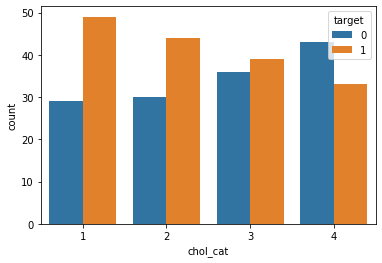

In [14]:
sns.countplot(df['chol_cat'],hue=df['target'])
print(df['chol_cat'].value_counts())
# plt.xticks('0-211','212-240','241-274','275 and greater')

WE can see that those who are having less serum cholestoral have higher chances of heart disease.

# chest pain type

In [15]:
df['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

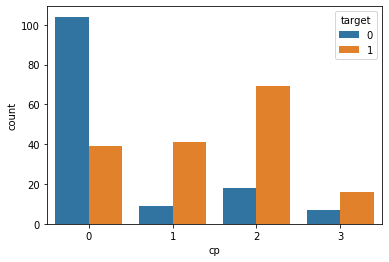

In [16]:
sns.countplot(df['cp'],hue=df['target'])

People having chest pain type 1 or 2 have changes of having heart disease

# maximum heart rate 

In [19]:
df['thalach'].describe()

count    303.000000
mean     149.646865
std       22.905161
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64

In [20]:
df['heart_cat']='NO'
# split the data using Q1,Q2,Q3,Q4
# Less than 133.5-(1)
# greater than 133.5 and less than equal to 153-(2)
# greater than 153 and less than  equal to 166-(3)
# greater than 16675-(4)
df.loc[(df['thalach']<=133.5),'heart_cat']='1'
df.loc[(df['thalach']>133.5) & (df['thalach']<=153),'heart_cat']='2'
df.loc[(df['thalach']>153) & (df['thalach']<=166),'heart_cat']='3'
df.loc[(df['thalach']>166),'heart_cat']='4'

2    78
1    76
4    75
3    74
Name: heart_cat, dtype: int64


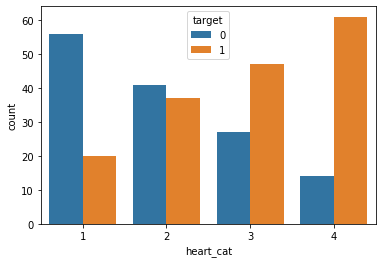

In [21]:
print(df['heart_cat'].value_counts())
sns.countplot(df['heart_cat'],hue=df['target'])

people with higher maximum heart rate have higher chances of heart disease.

# Exercise induced angina (1 = yes; 0 = no)

In [23]:
df['exang'].value_counts()

0    204
1     99
Name: exang, dtype: int64

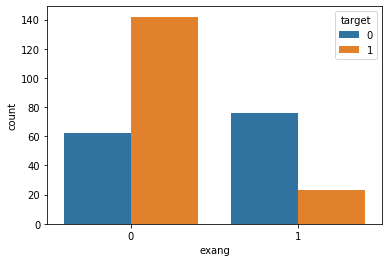

In [24]:
sns.countplot(df['exang'],hue=df['target'])

There are high chances of heart disease when exercise induced angina is true

In [26]:
df.drop(['thalach','chol'],axis=1,inplace=True)
df['chol_cat']=df['chol_cat'].astype(int)
df['heart_cat']=df['heart_cat'].astype(int)

# Splitting the Data into Train Test Data

In [27]:
X=df.drop('target',axis=1)
y=df['target']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=3)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(212, 13) (91, 13)
(212,) (91,)


In [29]:
import statsmodels.api as sm
X_constant=sm.add_constant(X_train)
from statsmodels.stats.outliers_influence import variance_inflation_factor 
for i in zip(X_constant.columns,[variance_inflation_factor(X_constant.values,j) for j in range (0,X_constant.shape[1])]):
    print(i)

('const', 136.6154385142511)
('age', 1.451965449452229)
('sex', 1.1781499062624234)
('cp', 1.3420048490800067)
('trestbps', 1.1605924931431952)
('fbs', 1.0834184920004695)
('restecg', 1.050463714317209)
('exang', 1.5358815238308556)
('oldpeak', 1.6692144079288753)
('slope', 1.4994757371328848)
('ca', 1.3091993358466867)
('thal', 1.1344139257620156)
('chol_cat', 1.156444335019359)
('heart_cat', 1.5421089192990416)


C:\Users\Shruti Udagire\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


# LogisticRegression

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve
lr=LogisticRegression(solver='liblinear')
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
y_train_pred=lr.predict(X_train)
y_train_prob=lr.predict_proba(X_train)
y_train_prob=y_train_prob[:,1]

In [32]:
print("Accuracy score",accuracy_score(y_train,y_train_pred))
print('Confusion matrix-Train','\n',confusion_matrix(y_train,y_train_pred))
print('AUC - Train',roc_auc_score(y_train,y_train_prob))

Accuracy score 0.8254716981132075
Confusion matrix-Train 
 [[78 22]
 [15 97]]
AUC - Train 0.9113392857142857


In [33]:
y_test_predict=lr.predict(X_test)
y_test_prob=lr.predict_proba(X_test)[:,1]
print("Accuracy score",accuracy_score(y_test,y_test_predict))
print('Confusion matrix-Test','\n',confusion_matrix(y_test,y_test_predict))
print('AUC - Test',roc_auc_score(y_test,y_test_prob))

Accuracy score 0.8681318681318682
Confusion matrix-Test 
 [[28 10]
 [ 2 51]]
AUC - Test 0.9111221449851042


In [34]:
fpr,tpr,threashold=roc_curve(y_test,y_test_prob)


Text(0, 0.5, 'TPR')

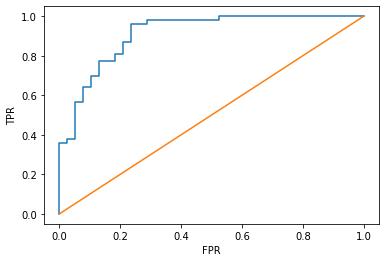

In [35]:
plt.plot(fpr,tpr)
plt.plot(fpr,fpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

# Random FOrest

In [47]:
# Here we are telling the model to create 100 decision tress and make random forest and calculated the score etc
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
rfc=RandomForestClassifier(n_estimators=100,random_state=3)
params={'n_estimators':sp_randint(50,200),
        'max_features':sp_randint(1,24),
        'max_depth':sp_randint(2,10),
        'min_samples_split':sp_randint(2,20),
        'min_samples_leaf':sp_randint(1,20),
        'criterion':['gini','entropy']
}
rsearch_rfc=RandomizedSearchCV(rfc,param_distributions=params,cv=3,scoring='roc_auc',random_state=3,return_train_score=True)
rsearch_rfc.fit(X,y)

C:\Users\Shruti Udagire\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
C:\Users\Shruti Udagire\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
C:\Users\Shruti Udagire\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
C:\Users\Shruti Udagire\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFail

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [48]:
rsearch_rfc.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=8, max_features=1,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, n_estimators=68,
                       n_jobs=None, oob_score=False, random_state=3, verbose=0,
                       warm_start=False)

In [49]:
rsearch_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 11,
 'n_estimators': 68}

In [50]:
rfc=RandomForestClassifier(**rsearch_rfc.best_params_)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=8, max_features=1,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, n_estimators=68,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [53]:
y_train_predict=rfc.predict(X_train)
y_train_prob=rfc.predict_proba(X_train)[:,1]
print("Accuracy score",accuracy_score(y_train,y_train_predict))
print("Confusion Matrix",confusion_matrix(y_train,y_train_predict))
print("Roc AUC score",roc_auc_score(y_train,y_train_prob))


Accuracy score 0.9292452830188679
Confusion Matrix [[ 90  10]
 [  5 107]]
Roc AUC score 0.9792857142857142


In [55]:
y_test_predict=rfc.predict(X_test)
y_test_prob=rfc.predict_proba(X_test)[:,1]
print("Accuracy score",accuracy_score(y_test,y_test_predict))
print("Confusion Matrix",confusion_matrix(y_test,y_test_predict))
print("Roc AUC score",roc_auc_score(y_test,y_test_prob))

Accuracy score 0.8791208791208791
Confusion Matrix [[30  8]
 [ 3 50]]
Roc AUC score 0.9438927507447865


Text(0, 0.5, 'TPR')

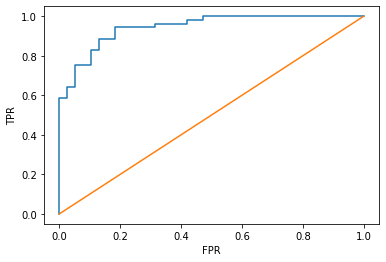

In [56]:
fpr,tpr,thresholds=roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [57]:
# important features
imp=pd.DataFrame(rfc.feature_importances_,index=X_train.columns,columns=['imp'])
imp=imp.sort_values(by='imp',ascending=False)
imp

,imp
oldpeak,0.140335
thal,0.133910
ca,0.104035
cp,0.099652
age,0.096053
exang,0.094454
heart_cat,0.072061
trestbps,0.064885
slope,0.063084
chol_cat,0.052913


# KNN Algorithm

In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from scipy.stats import randint as sp_randint
knc=KNeighborsClassifier()
params={
    'n_neighbors':sp_randint(2,6),
    'leaf_size':sp_randint(5,30),
    'p':sp_randint(1,5)
}
rs_knn=RandomizedSearchCV(knc,param_distributions=params,n_iter=15,scoring='roc_auc',return_train_score=True,cv=3)
rs_knn.fit(X,y)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=15, n_jobs=None,
                   param_distributions={'leaf_size': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001B5CF749788>,
                                        'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001B5CF7EF348>,
                                        'p': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001B5CECB96C8>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
               

In [63]:
rs_knn.best_params_

{'leaf_size': 23, 'n_neighbors': 2, 'p': 1}

In [64]:
knc=KNeighborsClassifier(**rs_knn.best_params_)
knc.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=23, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=1,
                     weights='uniform')

In [65]:
y_train_predict=knc.predict(X_train)
y_train_prob=knc.predict_proba(X_train)[:,1]
print("Accuracy score",accuracy_score(y_train,y_train_predict))
print("Confusion Matrix",confusion_matrix(y_train,y_train_predict))
print("Roc AUC score",roc_auc_score(y_train,y_train_prob))


Accuracy score 0.8349056603773585
Confusion Matrix [[100   0]
 [ 35  77]]
Roc AUC score 0.940625


In [66]:
y_test_predict=knc.predict(X_test)
y_test_prob=knc.predict_proba(X_test)[:,1]
print("Accuracy score",accuracy_score(y_test,y_test_predict))
print("Confusion Matrix",confusion_matrix(y_test,y_test_predict))
print("Roc AUC score",roc_auc_score(y_test,y_test_prob))

Accuracy score 0.7032967032967034
Confusion Matrix [[32  6]
 [21 32]]
Roc AUC score 0.7559582919563059


Text(0, 0.5, 'TPR')

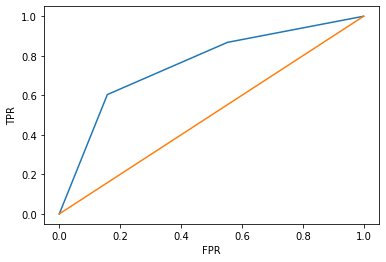

In [67]:
fpr,tpr,thresholds=roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

# BOosting algorithms

# 1)ADABOOOST

In [83]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
params={
    'n_estimators':sp_randint(5,40)
}
rs_ada=RandomizedSearchCV(ada,param_distributions=params,cv=3,scoring='accuracy')
rs_ada.fit(X,y)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                base_estimator=None,
                                                learning_rate=1.0,
                                                n_estimators=50,
                                                random_state=None),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001B5D1852D08>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='accuracy', verbose=0)

In [84]:
rs_ada.best_params_

{'n_estimators': 17}

In [85]:
ada=AdaBoostClassifier(**rs_ada.best_params_)
ada.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=17, random_state=None)

Overall Accuracy -Train 0.8490566037735849
Confusion matrix-Train 
 [[82 18]
 [14 98]]
AUC - Train 0.9483482142857143
-------------------------------------------------------------------------
Overall Accuracy -Test 0.8571428571428571
Confusion matrix-Test 
 [[29  9]
 [ 4 49]]
AUC - Test 0.9394240317775572
-------------------------------------------------------------------------



Text(0, 0.5, 'TPR')

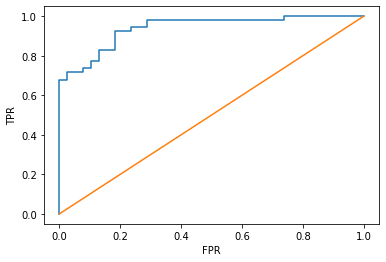

In [86]:
y_train_predict=ada.predict(X_train)
y_train_prob=ada.predict_proba(X_train)[:,-1]
y_train_predict
print('Overall Accuracy -Train',accuracy_score(y_train,y_train_predict))
print('Confusion matrix-Train','\n',confusion_matrix(y_train,y_train_predict))
print('AUC - Train',roc_auc_score(y_train,y_train_prob))
print("-------------------------------------------------------------------------")

y_test_pred=ada.predict(X_test)
y_test_prob=ada.predict_proba(X_test)[:,-1]
print('Overall Accuracy -Test',accuracy_score(y_test,y_test_pred))
print('Confusion matrix-Test','\n',confusion_matrix(y_test,y_test_pred))
print('AUC - Test',roc_auc_score(y_test,y_test_prob))
print("-------------------------------------------------------------------------")
print()

fpr,tpr,thresholds=roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

Accuracy score-Train 0.8915094339622641
Accuracy score-Test 0.8571428571428571


Text(0, 0.5, 'TPR')

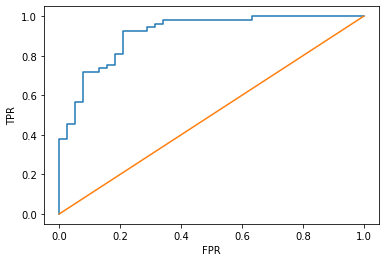

In [97]:
from sklearn.ensemble import VotingClassifier
lr=LogisticRegression(solver='liblinear')
knc=KNeighborsClassifier(**rs_knn.best_params_)
rfc=RandomForestClassifier(**rsearch_rfc.best_params_)
ada=AdaBoostClassifier(**rs_ada.best_params_)
clf=VotingClassifier(estimators=[('lr',lr),('knn',knc),('rfc',rfc),['ada',ada]],voting='hard')
clf.fit(X_train,y_train)
y_train_pred=clf.predict(X_train)
y_test_predt=clf.predict(X_test)

print('Accuracy score-Train',accuracy_score(y_train,y_train_pred))
print('Accuracy score-Test',accuracy_score(y_test,y_test_pred))


fpr,tpr,thresholds=roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [99]:
clf=VotingClassifier(estimators=[('lr',lr),('knn',knc),('rfc',rfc),['ada',ada]],voting='soft')
clf.fit(X_train,y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='liblinear', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('knn',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=23,
                                                   metric='minkowsk...
                                            

Accuracy score-Train 0.9198113207547169
Accuracy score-Test 0.8571428571428571
Roc AuC Score-Train 0.9746428571428571
Roc AuC Score-Test 0.9096325719960279


Text(0, 0.5, 'TPR')

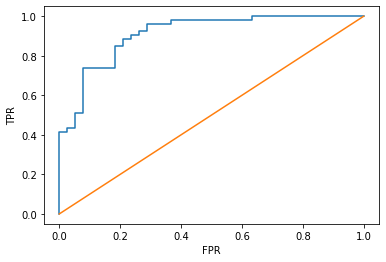

In [100]:
y_train_pred=clf.predict(X_train)
y_test_predt=clf.predict(X_test)
y_train_prob=clf.predict_proba(X_train)[:,1]
y_test_prob=clf.predict_proba(X_test)[:,1]

print('Accuracy score-Train',accuracy_score(y_train,y_train_pred))
print('Accuracy score-Test',accuracy_score(y_test,y_test_pred))

print('Roc AuC Score-Train',roc_auc_score(y_train,y_train_prob))
print('Roc AuC Score-Test',roc_auc_score(y_test,y_test_prob))


fpr,tpr,thresholds=roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

LogisticRegression
    Train-0.91
    Test-0.91


Random FOrest
     Train-0.97
     Test-0.94

KNN
    Train-0.94
    Test-0.75

ADA Boost
    Train-0.94
    Test-0.93

    
Stacking
    1)Hard Voting:
        Train Accuracy score-0.89
        Test Accuracy score-0.85
    2)Soft Voting:
        Train-0.97
        Test 0.90